<a href="https://colab.research.google.com/github/Venture-Coding/Linkedin_Learning/blob/main/NLP/Sarcasm_Is_It_NLP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying News Headlines

This notebook explains the classification of news headlines as sarcastic and non-sarcastic. We are using the same headlines data as used before.


In [5]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.7.0


## Downloading the News Headlines data

In [6]:
!wget --no-check-certificate \
    https://storage.googleapis.com/wdd-2-node.appspot.com/x1.json \
    -o /tmp/headlines.json

In [7]:
##read the the json file using pandas
import pandas as pd

data = pd.read_json("Sarcasm_Headlines_Dataset.json", lines = True)
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [9]:
##store headlines and labels in respective lists
headlines = list(data['headline'])
labels = list(data['is_sarcastic'])

## Set the parameters

In [10]:
##define tokenizing and padding parameters
vocab_size = 10000
max_length = 120
embedding_dim = 16
#trunc_type='post' #removing to check performance
padding_type='pre' #changing from post
oov_tok = "<oov>"
training_size = 18000

## Splitting the training and testing set

In [11]:
##sentences
training_sentences = headlines[0:training_size]
testing_sentences = headlines[training_size:]

##labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

## Preprocess sentences


In [12]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type) #truncating=trunc_type removed

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type) #, truncating=trunc_type removed

In [13]:
# convert lists into numpy arrays to make it work with TensorFlow 2.x
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

## Define the Neural Network model with the following layers:
1. Embedding layer
2. Global Average pooling layer(1D)
3. Dense layer with 24 nodes
4. Output Dense layer with `sigmoid` activation 

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

##compile the model
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


## Train the model

Save it into history

In [16]:
num_epochs = 10
history = model.fit(training_padded, 
                    training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), 
                    verbose=2)

Epoch 1/10
563/563 - 6s - loss: 0.6827 - accuracy: 0.5586 - val_loss: 0.6665 - val_accuracy: 0.5654 - 6s/epoch - 11ms/step
Epoch 2/10
563/563 - 3s - loss: 0.5333 - accuracy: 0.7532 - val_loss: 0.4199 - val_accuracy: 0.8256 - 3s/epoch - 5ms/step
Epoch 3/10
563/563 - 3s - loss: 0.3463 - accuracy: 0.8611 - val_loss: 0.3794 - val_accuracy: 0.8281 - 3s/epoch - 5ms/step
Epoch 4/10
563/563 - 3s - loss: 0.2853 - accuracy: 0.8878 - val_loss: 0.3448 - val_accuracy: 0.8539 - 3s/epoch - 5ms/step
Epoch 5/10
563/563 - 3s - loss: 0.2471 - accuracy: 0.9034 - val_loss: 0.3431 - val_accuracy: 0.8545 - 3s/epoch - 5ms/step
Epoch 6/10
563/563 - 3s - loss: 0.2176 - accuracy: 0.9161 - val_loss: 0.3422 - val_accuracy: 0.8562 - 3s/epoch - 5ms/step
Epoch 7/10
563/563 - 3s - loss: 0.1938 - accuracy: 0.9273 - val_loss: 0.3470 - val_accuracy: 0.8520 - 3s/epoch - 5ms/step
Epoch 8/10
563/563 - 3s - loss: 0.1725 - accuracy: 0.9366 - val_loss: 0.3585 - val_accuracy: 0.8521 - 3s/epoch - 5ms/step
Epoch 9/10
563/563 - 3s

In [17]:
loss, accuracy = model.evaluate(training_padded, training_labels, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(testing_padded, testing_labels, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9592
Testing Accuracy:  0.8513


After a long tussle with hyperparameter optimization, we finally got out of the overfitting trap.  
Earlier at embedding = 50, max len =100, adam learning rate = 0.01 and   
also at embedding=16, training size = 20k (with/out learning rate = 0.01).  
The model kept overfitting, reaching 99-100% training accuracy and reducing validation acccuracy overtime with epochs.  
Too many epochs also were overfitting the data, tried at 50, 100, with no improvement.


## Visualise the train & validation accuracy and loss

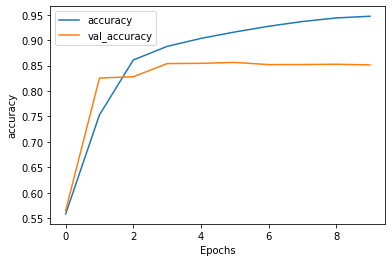

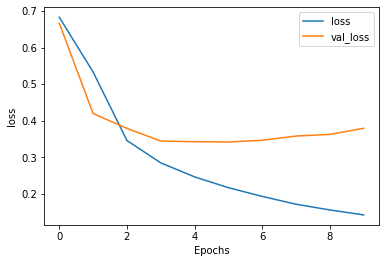

In [18]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.legend([string, 'val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

By far the lowest loss and highest accuracy, with just embeddings (No GloVe, W2V, RNN, LSTM or CNN.  
Acc is much higher (and loss lower) than the instructor of the course, himself. {happy moments 😀}

## Classifying a new sentence

In [19]:
sentence = ["the experts comment while the kids lament", "the day isnt far where daughters rule"]

##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, padding=padding_type)  #, truncating=trunc_type rem

print(model.predict(padded_seqs))

[[0.00199462]
 [0.45524815]]


As visible, with Word Embeddings, the model does an good job even with new sentences. But it's time to try deeper models to see if they are able to do a better job on this or a similar dataset.

## Using the LSTM model with the following layers:
1. Embedding layer
2. Add two bidirectional LSTM layers with 64 and 32 as number of outputs.
3. Dense layer with 24 nodes
4. Output Dense layer with `sigmoid` activation 

In [20]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 120, 64)          12544     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 24)                1560      
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 198,961
Trainable params: 198,961
Non-tr

In [25]:
num_epochs = 5
history2 = model2.fit(training_padded,
                    training_labels,
                    epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels),
                    verbose=2)

Epoch 1/5
563/563 - 64s - loss: 0.1889 - accuracy: 0.9321 - val_loss: 0.4367 - val_accuracy: 0.8342 - 64s/epoch - 114ms/step
Epoch 2/5
563/563 - 64s - loss: 0.1437 - accuracy: 0.9509 - val_loss: 0.4556 - val_accuracy: 0.8313 - 64s/epoch - 114ms/step
Epoch 3/5
563/563 - 64s - loss: 0.1130 - accuracy: 0.9633 - val_loss: 0.5115 - val_accuracy: 0.8341 - 64s/epoch - 114ms/step
Epoch 4/5
563/563 - 64s - loss: 0.0883 - accuracy: 0.9729 - val_loss: 0.5397 - val_accuracy: 0.8299 - 64s/epoch - 114ms/step
Epoch 5/5
563/563 - 64s - loss: 0.0764 - accuracy: 0.9767 - val_loss: 0.6025 - val_accuracy: 0.8258 - 64s/epoch - 114ms/step


Val falls 85 >> 82.7 ; Trn 99 : 30 epoch , no GAPooling, 1st LSTM - 64 units.

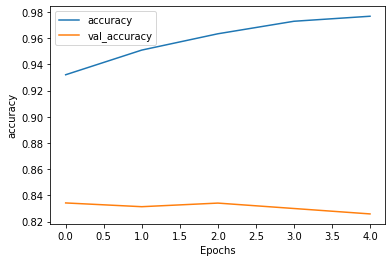

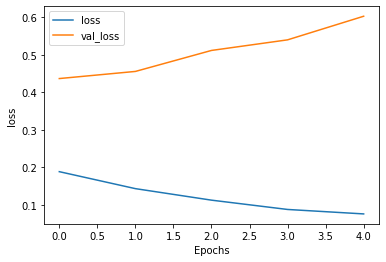

In [26]:
plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")

Given the nature of our dataset, it seems the accuracy just isn't crossing the 80s.
Even 2 Bidirevtional LSTMs are overfitting on training data and val loss increases with epochs. 
Some hyper-parameter tuning might help, but cost:benefit looks bleak after studying 4 other models by machinelearningmastery.com, medium.com, towardsdatascience and one from kaggle.  
So better to try out a CNN model before wrapping up this project.

## Improving performance using CNN 

Define the neural network model with the following layers:
1. Embedding layer
2. Replace the bidirectional LSTM layers with convolutional layers with a filter size of 5.
3. GlovalAveragePooling Layer to down sample the feature map.
3. Dense layer with 24 nodes
4. Output Dense layer with `sigmoid` activation 

In [30]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 116, 64)           5184      
                                                                 
 global_average_pooling1d_2   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 24)                1560      
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 166,769
Trainable params: 166,769
Non-trainable params: 0
________________________________________________

In [32]:
num_epochs = 5
history3 = model3.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/5
563/563 - 30s - loss: 0.5212 - accuracy: 0.7202 - val_loss: 0.3648 - val_accuracy: 0.8375 - 30s/epoch - 54ms/step
Epoch 2/5
563/563 - 3s - loss: 0.2750 - accuracy: 0.8867 - val_loss: 0.3419 - val_accuracy: 0.8484 - 3s/epoch - 6ms/step
Epoch 3/5
563/563 - 3s - loss: 0.1978 - accuracy: 0.9246 - val_loss: 0.3669 - val_accuracy: 0.8473 - 3s/epoch - 6ms/step
Epoch 4/5
563/563 - 3s - loss: 0.1503 - accuracy: 0.9456 - val_loss: 0.4135 - val_accuracy: 0.8387 - 3s/epoch - 6ms/step
Epoch 5/5
563/563 - 3s - loss: 0.1173 - accuracy: 0.9592 - val_loss: 0.4857 - val_accuracy: 0.8314 - 3s/epoch - 6ms/step


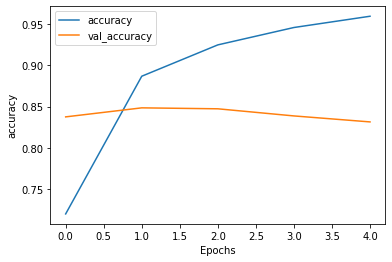

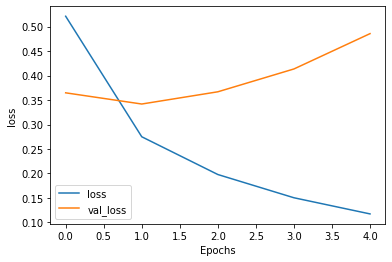

In [33]:
plot_graphs(history3, "accuracy")
plot_graphs(history3, "loss")

In [35]:
loss, accuracy3 = model3.evaluate(training_padded, training_labels, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy3))
loss, accuracy3 = model3.evaluate(testing_padded, testing_labels, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy3))

Training Accuracy: 0.9732
Testing Accuracy:  0.8314


As expected, the CNN models also gives similar results, although a bit faster(quite), and with lesser layers and 30,000 lesser parameters compared to the LSTM model.